In [42]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm

In [43]:
pf = hm.ParaFrame('cache/SPO2023/summ/{NGC}_a{aspin:g}_i{inc:g}_{freq}.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

NGC ['NGC3998' 'NGC4261' 'NGC4594']
aspin [-0.94 -0.5   0.    0.5   0.94]
inc [ 50. 160.]
freq ['230.e9' '345.e9' '86.e9']


/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v


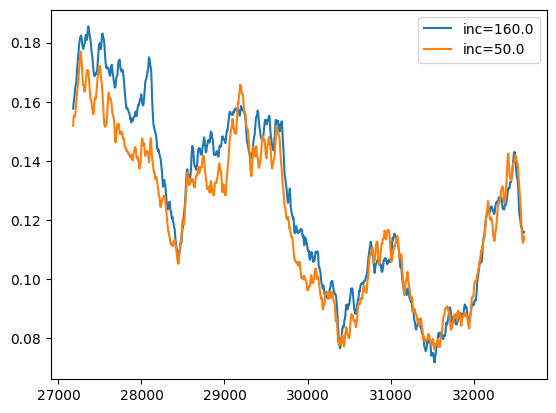

In [44]:
sel = pf(NGC='NGC3998')(aspin=0.94)(freq='230.e9')
for p in range(len(sel)):
    df = pd.read_csv(sel.path.iloc[p], sep='\t')
    plt.plot(df.time_hr, df.Ftot, label='inc=' + str(sel.inc.iloc[p]))
    plt.legend()

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

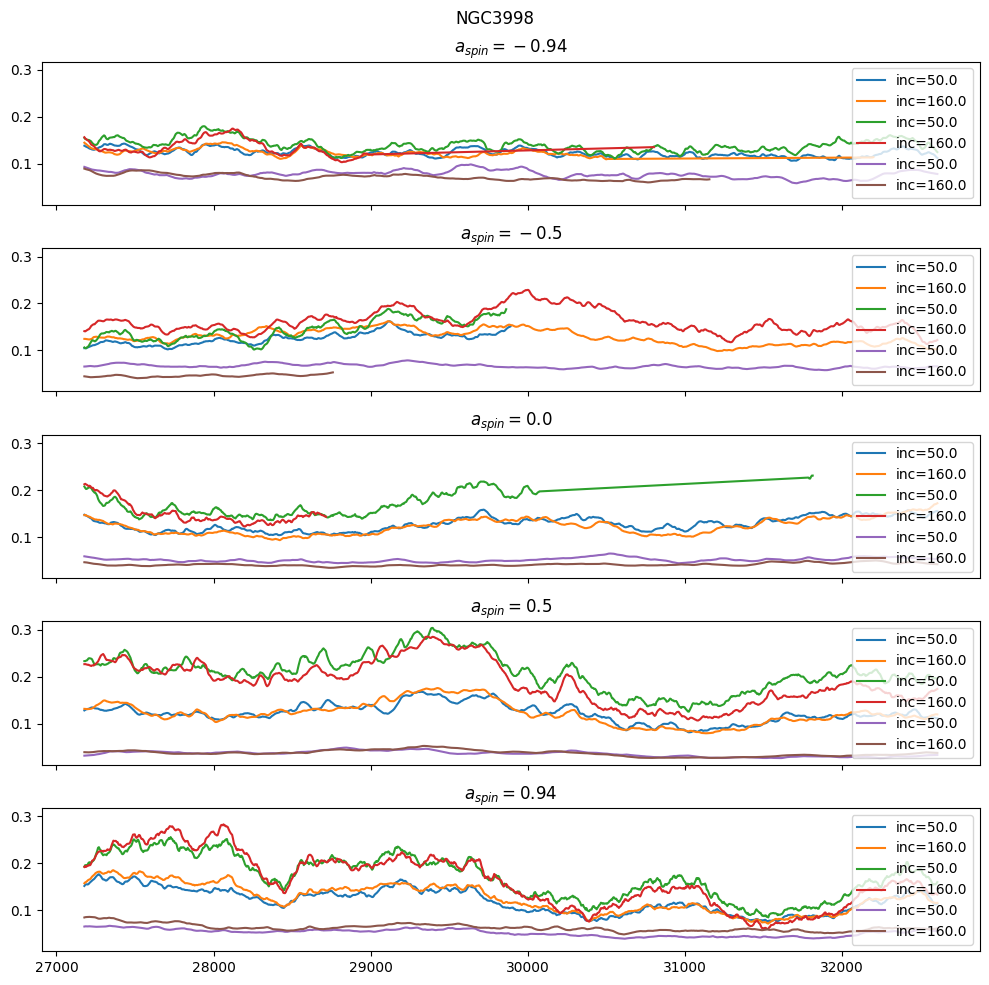

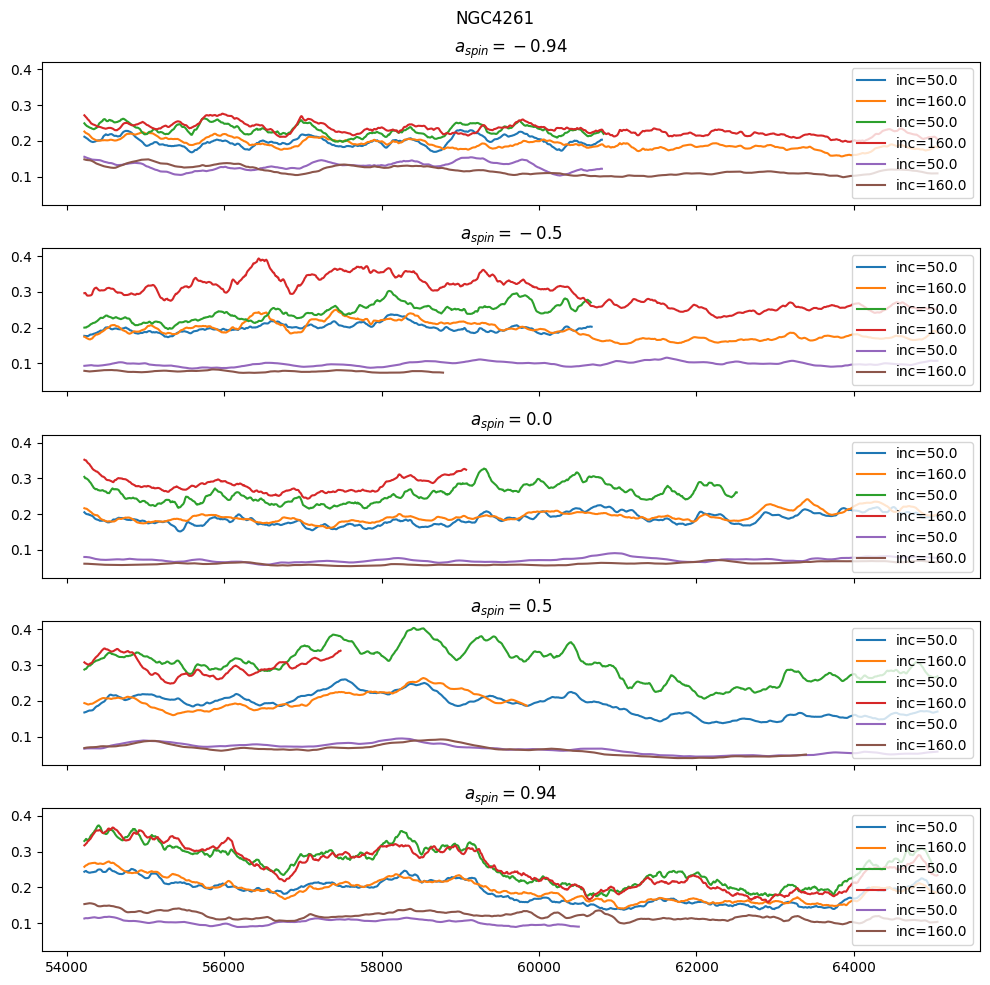

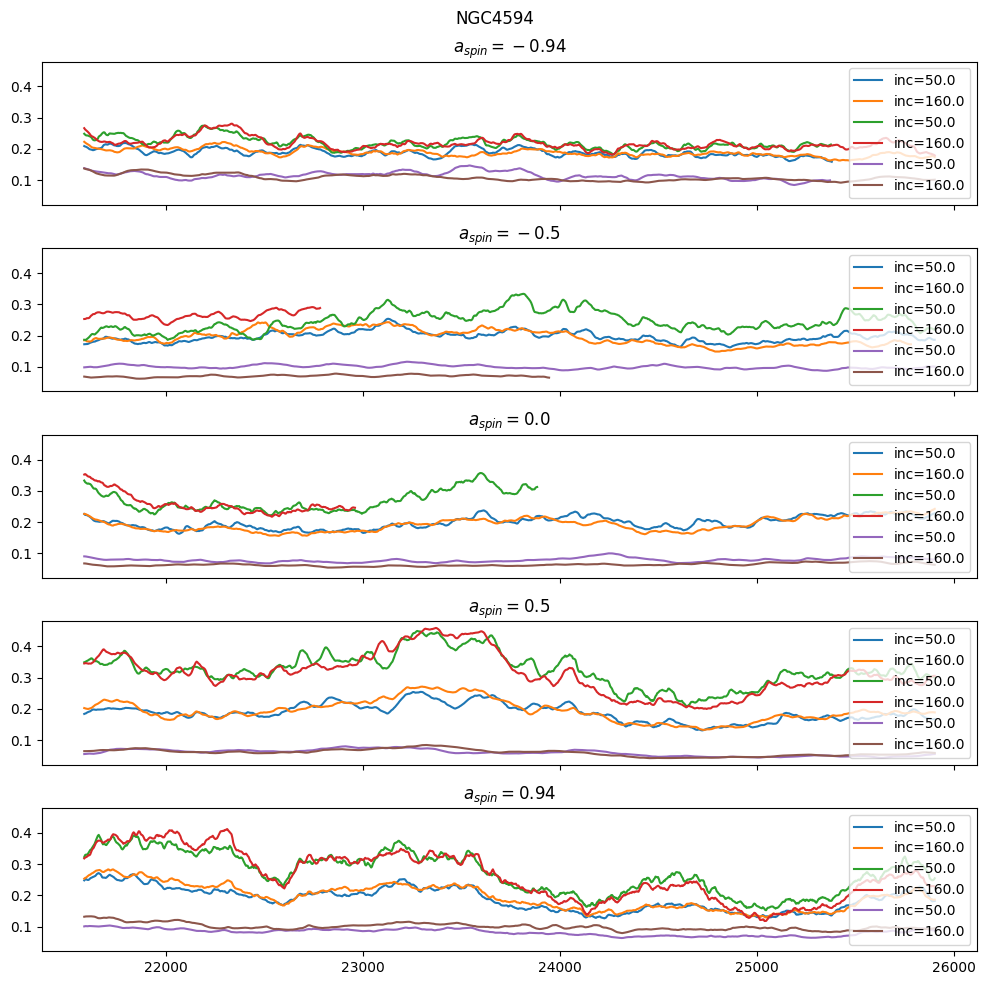

In [48]:
for obj in NGC:

    fig, axes = plt.subplots(5, figsize=(10,10), sharex=True, sharey=True)

    for c, a in enumerate(aspin):
        for f in freq:
            for i in inc:
                sel = pf(freq=f)(aspin=a)(NGC=obj)(inc=i)
                if len(sel) != 1:
                     print('WARNING: too many matchingn tables')
                elif len(sel) != 0:
                    df = pd.read_csv(sel.path.iloc[0], sep='\t')
                    axes[c].plot(df.time_hr, df.Ftot, label='inc=' + str(i))
                    axes[c].set_title(f'$a_{{spin}} = {a}$')
                    axes[c].legend()
                else:
                    print("No corresponding file, SKIP")
        fig.suptitle(f'{obj}')
    fig.tight_layout()